## Ames Housing Data
## Make plots of regression coefficients

Code for this section taken from https://zhiyzuo.github.io/Python-Plot-Regression-Coefficient/

In [9]:
# import ipynb.fs.defs.project2

In [10]:
import pickle
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [11]:
# retrieve model results 
model = pickle.load(open('basemodel.sav', 'rb'))

In [12]:
model.params

const             9.288549e+00
Gr Liv Area       4.515453e-04
live_ar_sq       -4.228848e-08
basement_area     1.225848e-04
Lot Area          3.581764e-06
frontageLT35     -4.878904e-02
TotRms AbvGrd    -5.232840e-03
Bedroom AbvGr    -2.177157e-02
full_bath_0      -6.517843e-03
full_bath_2      -9.601321e-03
full_bath_3       4.263095e-02
half_bath_1       7.658950e-03
half_bath_2      -1.127445e-01
hill              4.402083e-02
culdesac          2.326606e-02
fancysuburb       6.601138e-02
suburb            3.244789e-02
near_artery      -6.106633e-02
near_feeder      -1.791793e-02
near_park         3.954535e-02
Year Built        8.588670e-04
hip_roof          1.104338e-02
two_fam          -2.728692e-02
two_story        -1.266317e-02
zoning            6.798525e-02
ac                9.168716e-02
Fireplaces        4.078614e-02
breakers          1.860023e-02
unf_garage       -1.311216e-02
num_cars          3.983526e-02
paved_driveway    7.914540e-02
concrete          2.577046e-02
exc_qual

In [13]:
err_series = model.params - model.conf_int()[0]

In [14]:
all_coef_df = pd.DataFrame({'coef': model.params.values[1:],
                        'err': err_series.values[1:],
                        'varname': err_series.index.values[1:]
                       })

In [15]:
all_coef_df 

,coef,err,varname
0,4.515453e-04,7.898737e-05,Gr Liv Area
1,-4.228848e-08,1.899896e-08,live_ar_sq
2,1.225848e-04,2.185888e-05,basement_area
3,3.581764e-06,1.038347e-06,Lot Area
4,-4.878904e-02,3.407298e-02,frontageLT35
5,-5.232840e-03,7.768488e-03,TotRms AbvGrd
6,-2.177157e-02,1.109262e-02,Bedroom AbvGr
7,-6.517843e-03,9.967069e-02,full_bath_0
8,-9.601321e-03,1.971852e-02,full_bath_2
9,4.263095e-02,4.821011e-02,full_bath_3


In [16]:
def plot_coefs(df,ylabel,xlabel,varname):
    fig, ax = plt.subplots(figsize=(18, 10))
    coef_df.plot(x='varname', y='coef', kind='bar', 
                 ax=ax, color='none', 
                 yerr='err', legend=False)
    ax.set_ylabel(ylabel,fontsize=20)
    ax.set_xlabel(xlabel)
    ax.scatter(x=pd.np.arange(coef_df.shape[0]), 
               marker='s', s=120, 
               y=coef_df['coef'], color='black')
    ax.axhline(y=0, linestyle='--', color='r', linewidth=3)
    ax.xaxis.set_ticks_position('none')
    _ = ax.set_xticklabels(varname,rotation=0, fontsize=16)
    plt.rcParams.update({'font.size': 20})
 

In [18]:
list(all_coef_df[0:5]['varname'])

['Gr Liv Area', 'live_ar_sq', 'basement_area', 'Lot Area', 'frontageLT35']

C:\Users\pauls\Anaconda3\envs\dsi\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\pauls\Anaconda3\envs\dsi\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\pauls\Anaconda3\envs\dsi\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\pauls\Anaconda3\envs\dsi\lib\site-packages\ipykernel_launcher.py:10: Sett

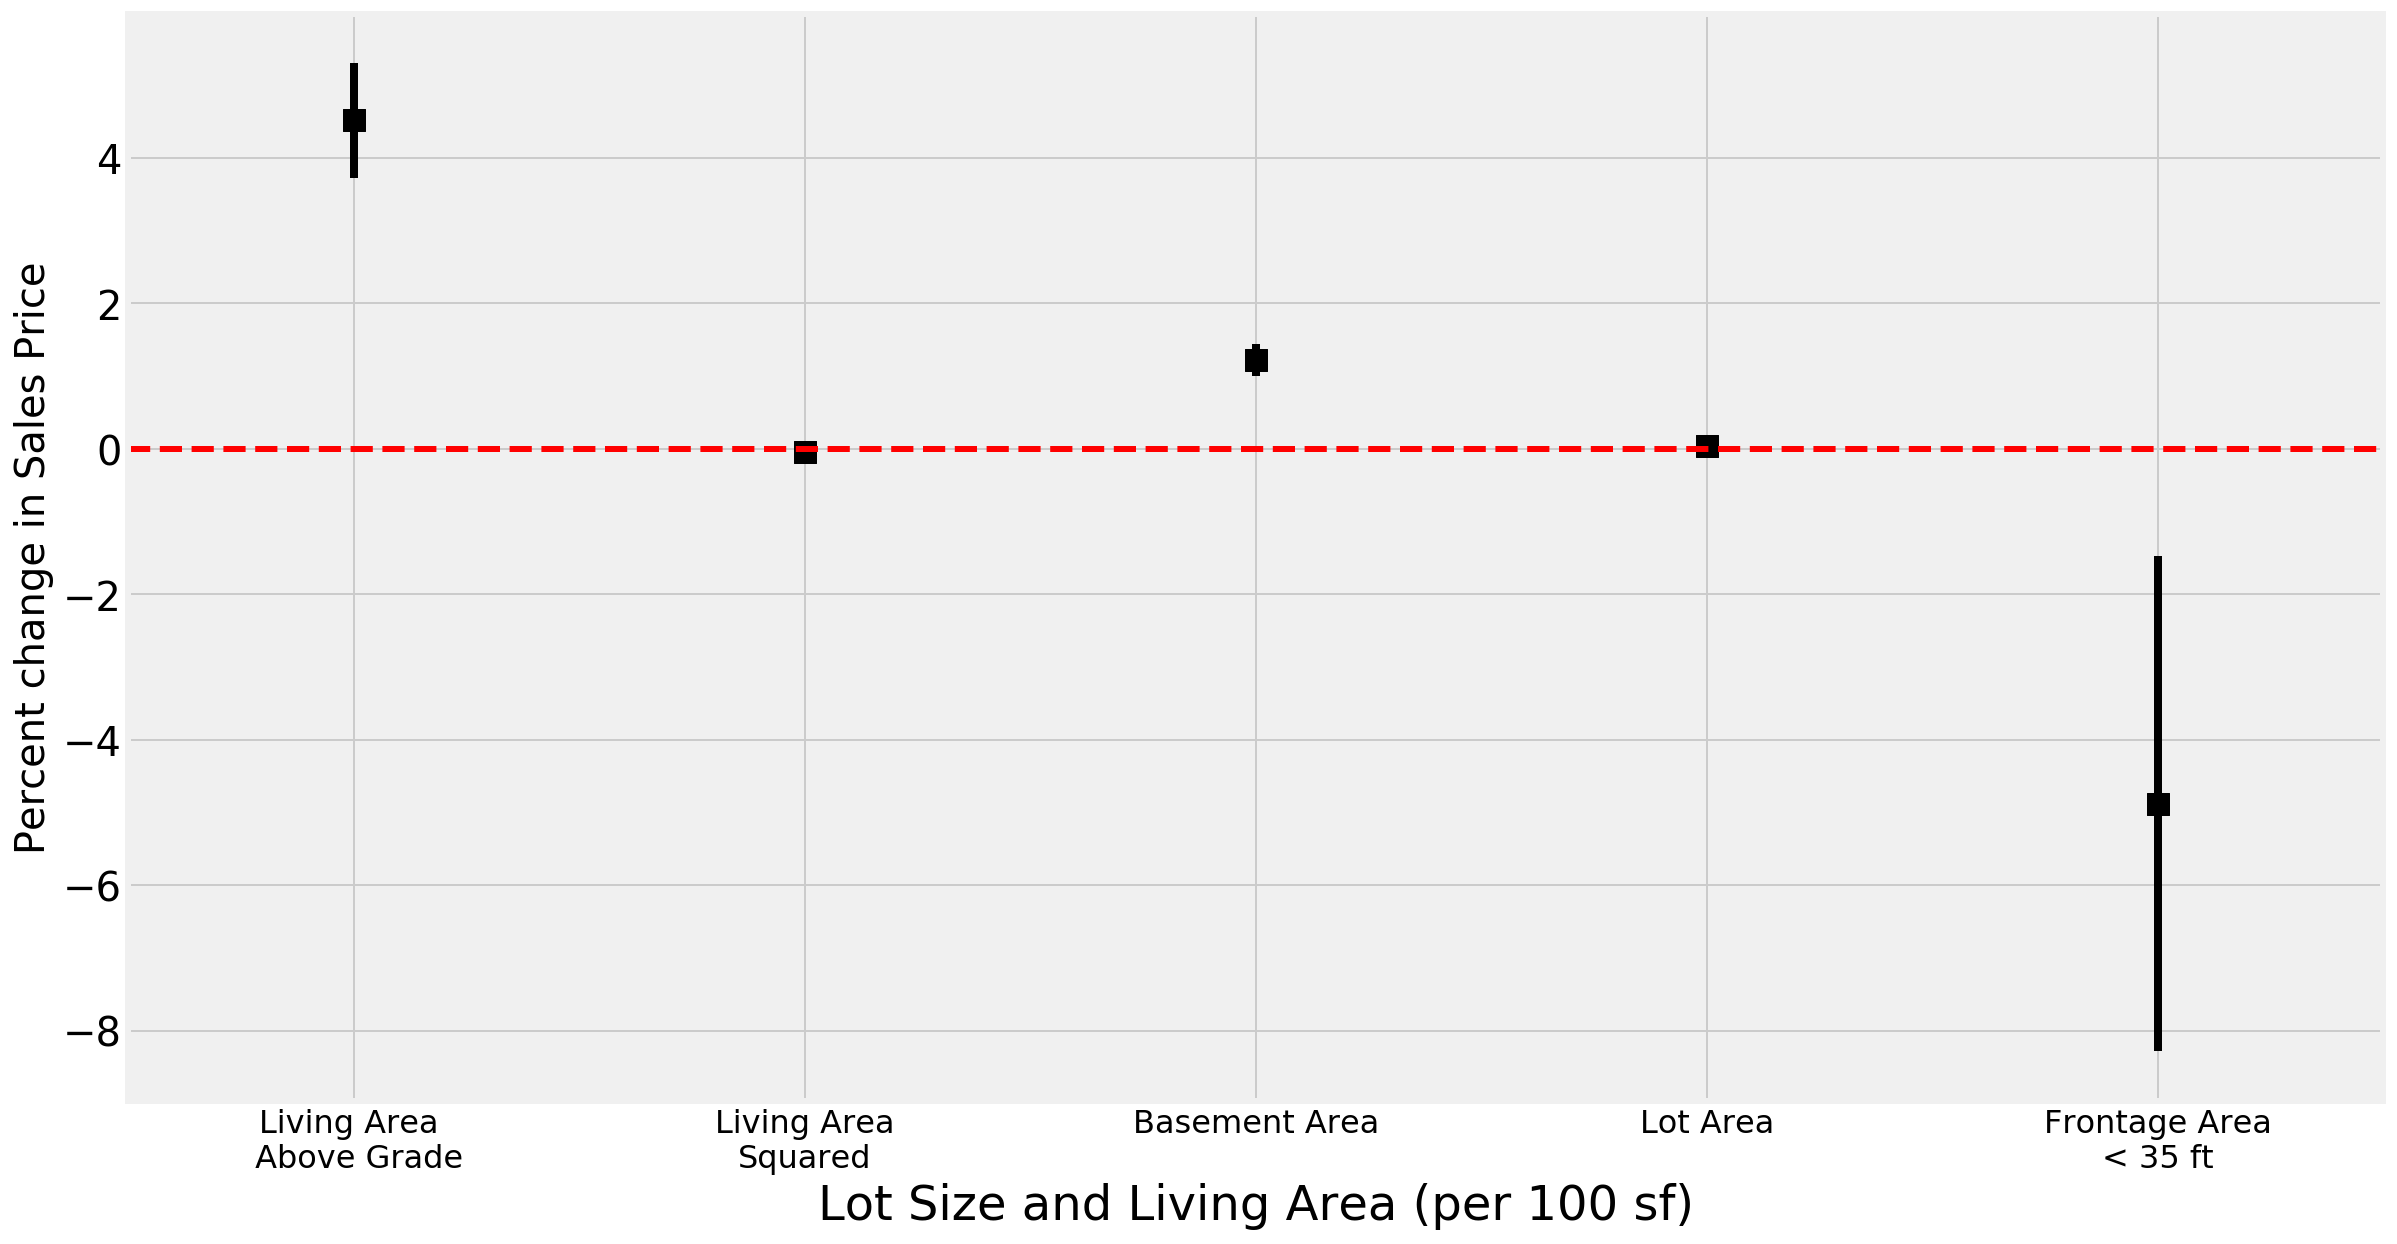

In [20]:
# Lot and Living Area
coef_df = all_coef_df[0:5].copy()
coef_df['coef']=coef_df['coef']*100 # rescale to percents
coef_df['err']=coef_df['err']*100
mask = (coef_df['varname']!='frontageLT35')
coef_df['coef'][mask]=coef_df['coef']*100 # rescale to 100 sq ft.
coef_df['err'][mask]=coef_df['err']*100
mask = (coef_df['varname']=='live_ar_sq')
coef_df['coef'][mask]=coef_df['coef']*100 # another *100 for squared term.
coef_df['err'][mask]=coef_df['err']*100

varname =['Living Area \n Above Grade',
 'Living Area\nSquared',
 'Basement Area',
 'Lot Area',
 'Frontage Area\n< 35 ft']
ylabel='Percent change in Sales Price'
xlabel='Lot Size and Living Area (per 100 sf)'
plot_coefs(coef_df,ylabel,xlabel,varname)
plt.savefig('size.png')

In [21]:
list(all_coef_df[5:12]['varname'])

['TotRms AbvGrd',
 'Bedroom AbvGr',
 'full_bath_0',
 'full_bath_2',
 'full_bath_3',
 'half_bath_1',
 'half_bath_2']

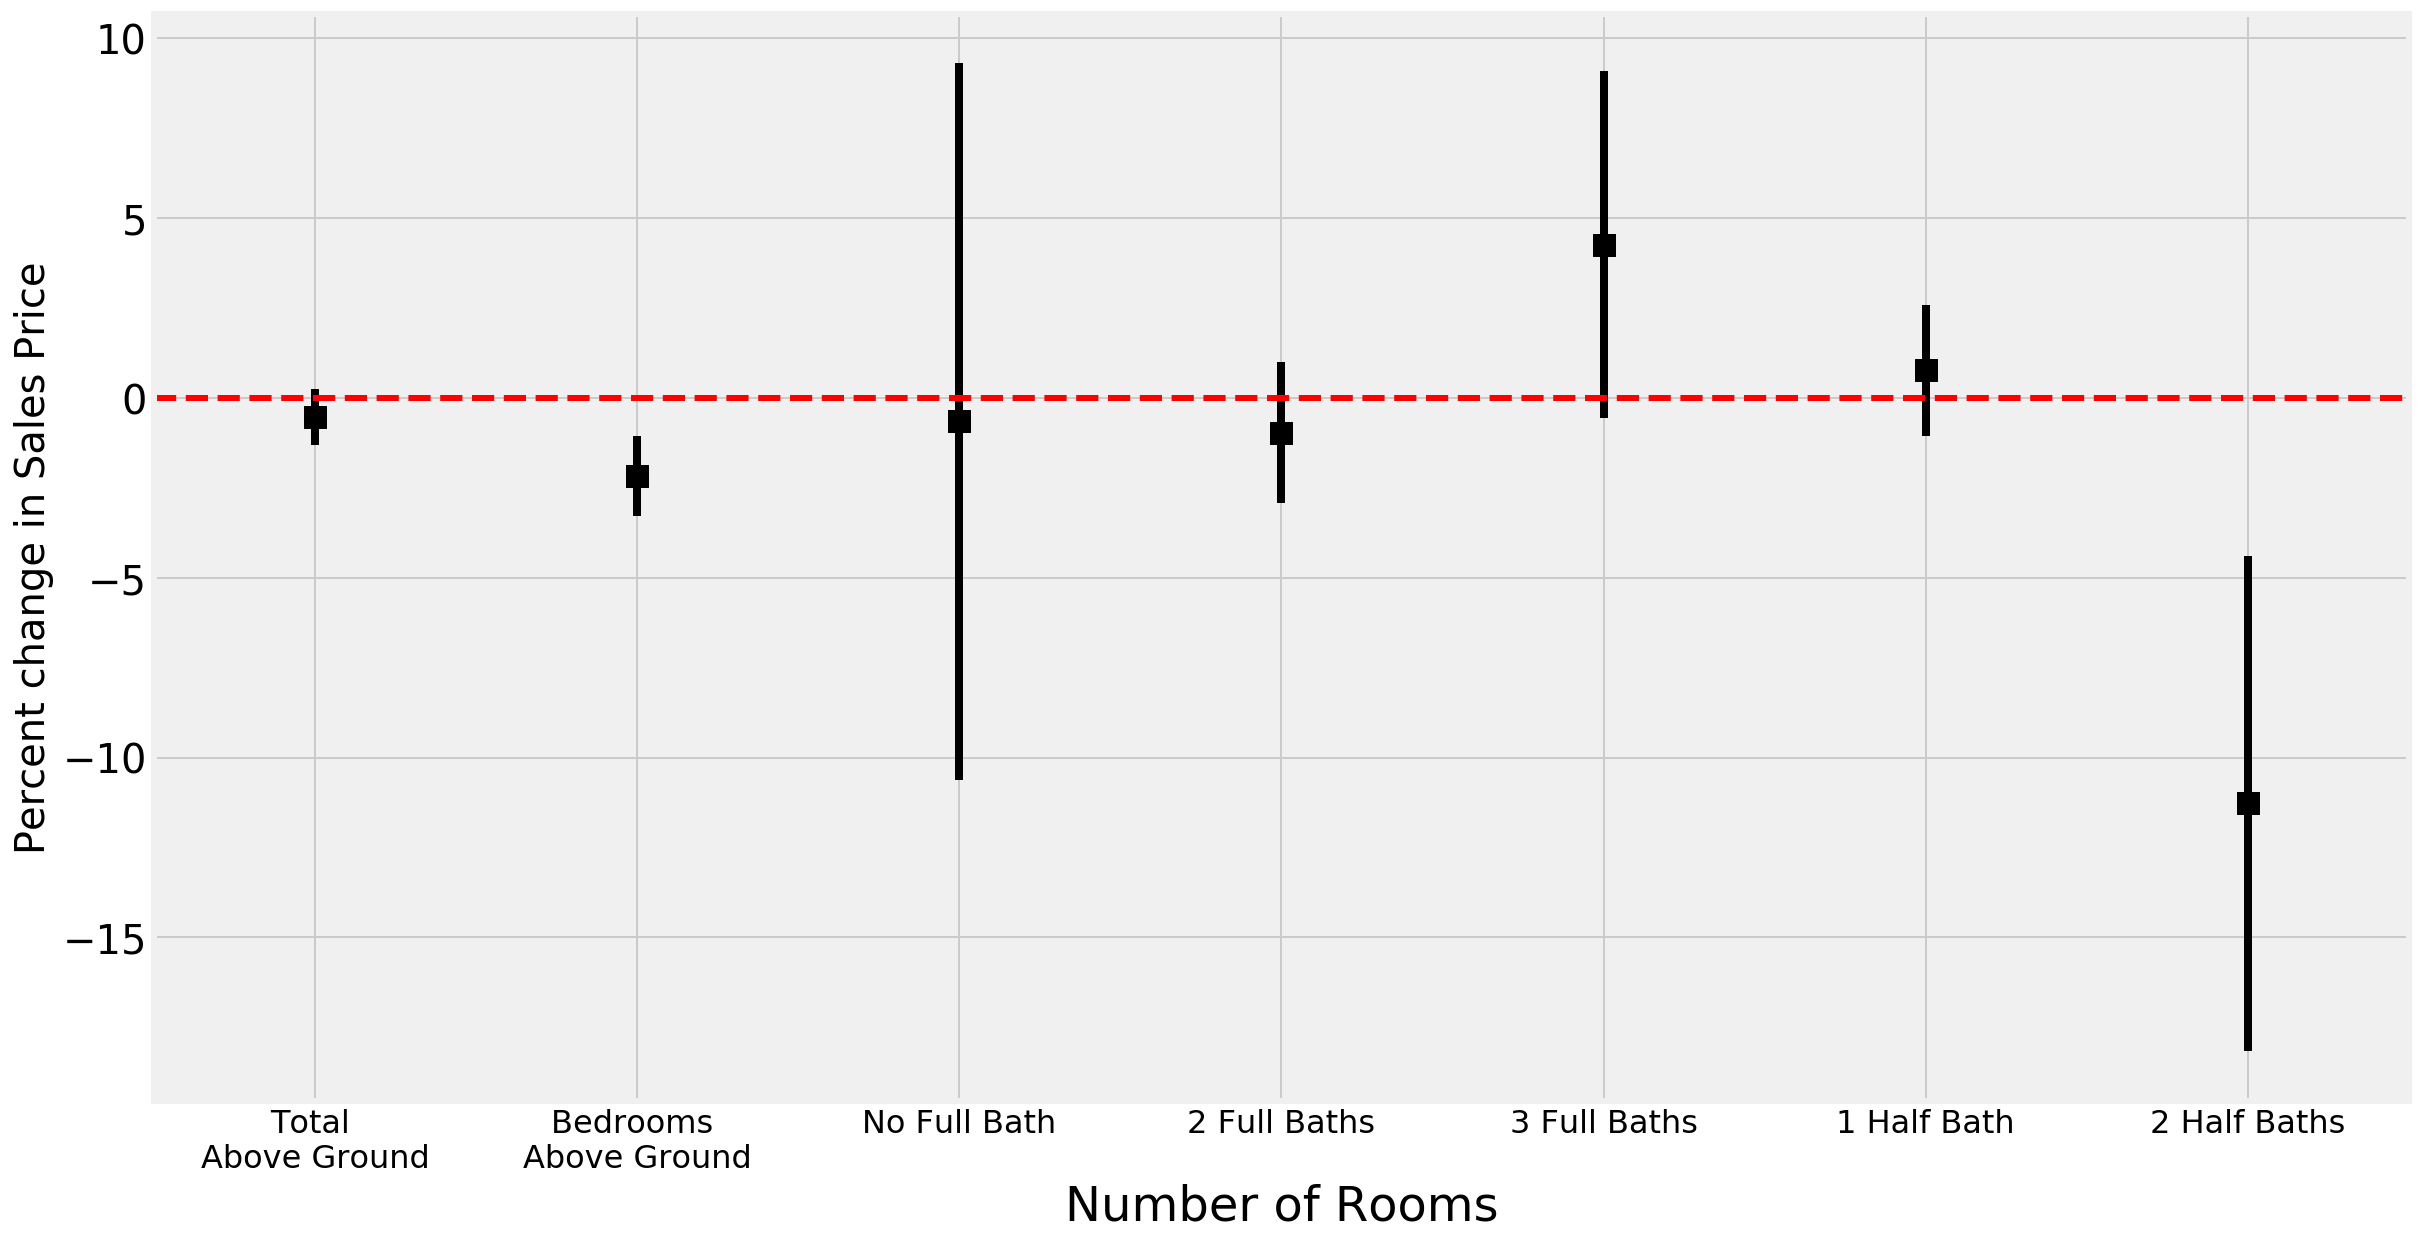

In [22]:
# Number of Rooms
coef_df = all_coef_df[5:12].copy()
coef_df['coef']=coef_df['coef']*100 # rescale to percents
coef_df['err']=coef_df['err']*100

varname =['Total \nAbove Ground',
 'Bedrooms \nAbove Ground',
 'No Full Bath',
 '2 Full Baths',
 '3 Full Baths',
 '1 Half Bath',
 '2 Half Baths']
ylabel='Percent change in Sales Price'
xlabel='Number of Rooms'
plot_coefs(coef_df,ylabel,xlabel,varname)
plt.savefig('rooms.png')

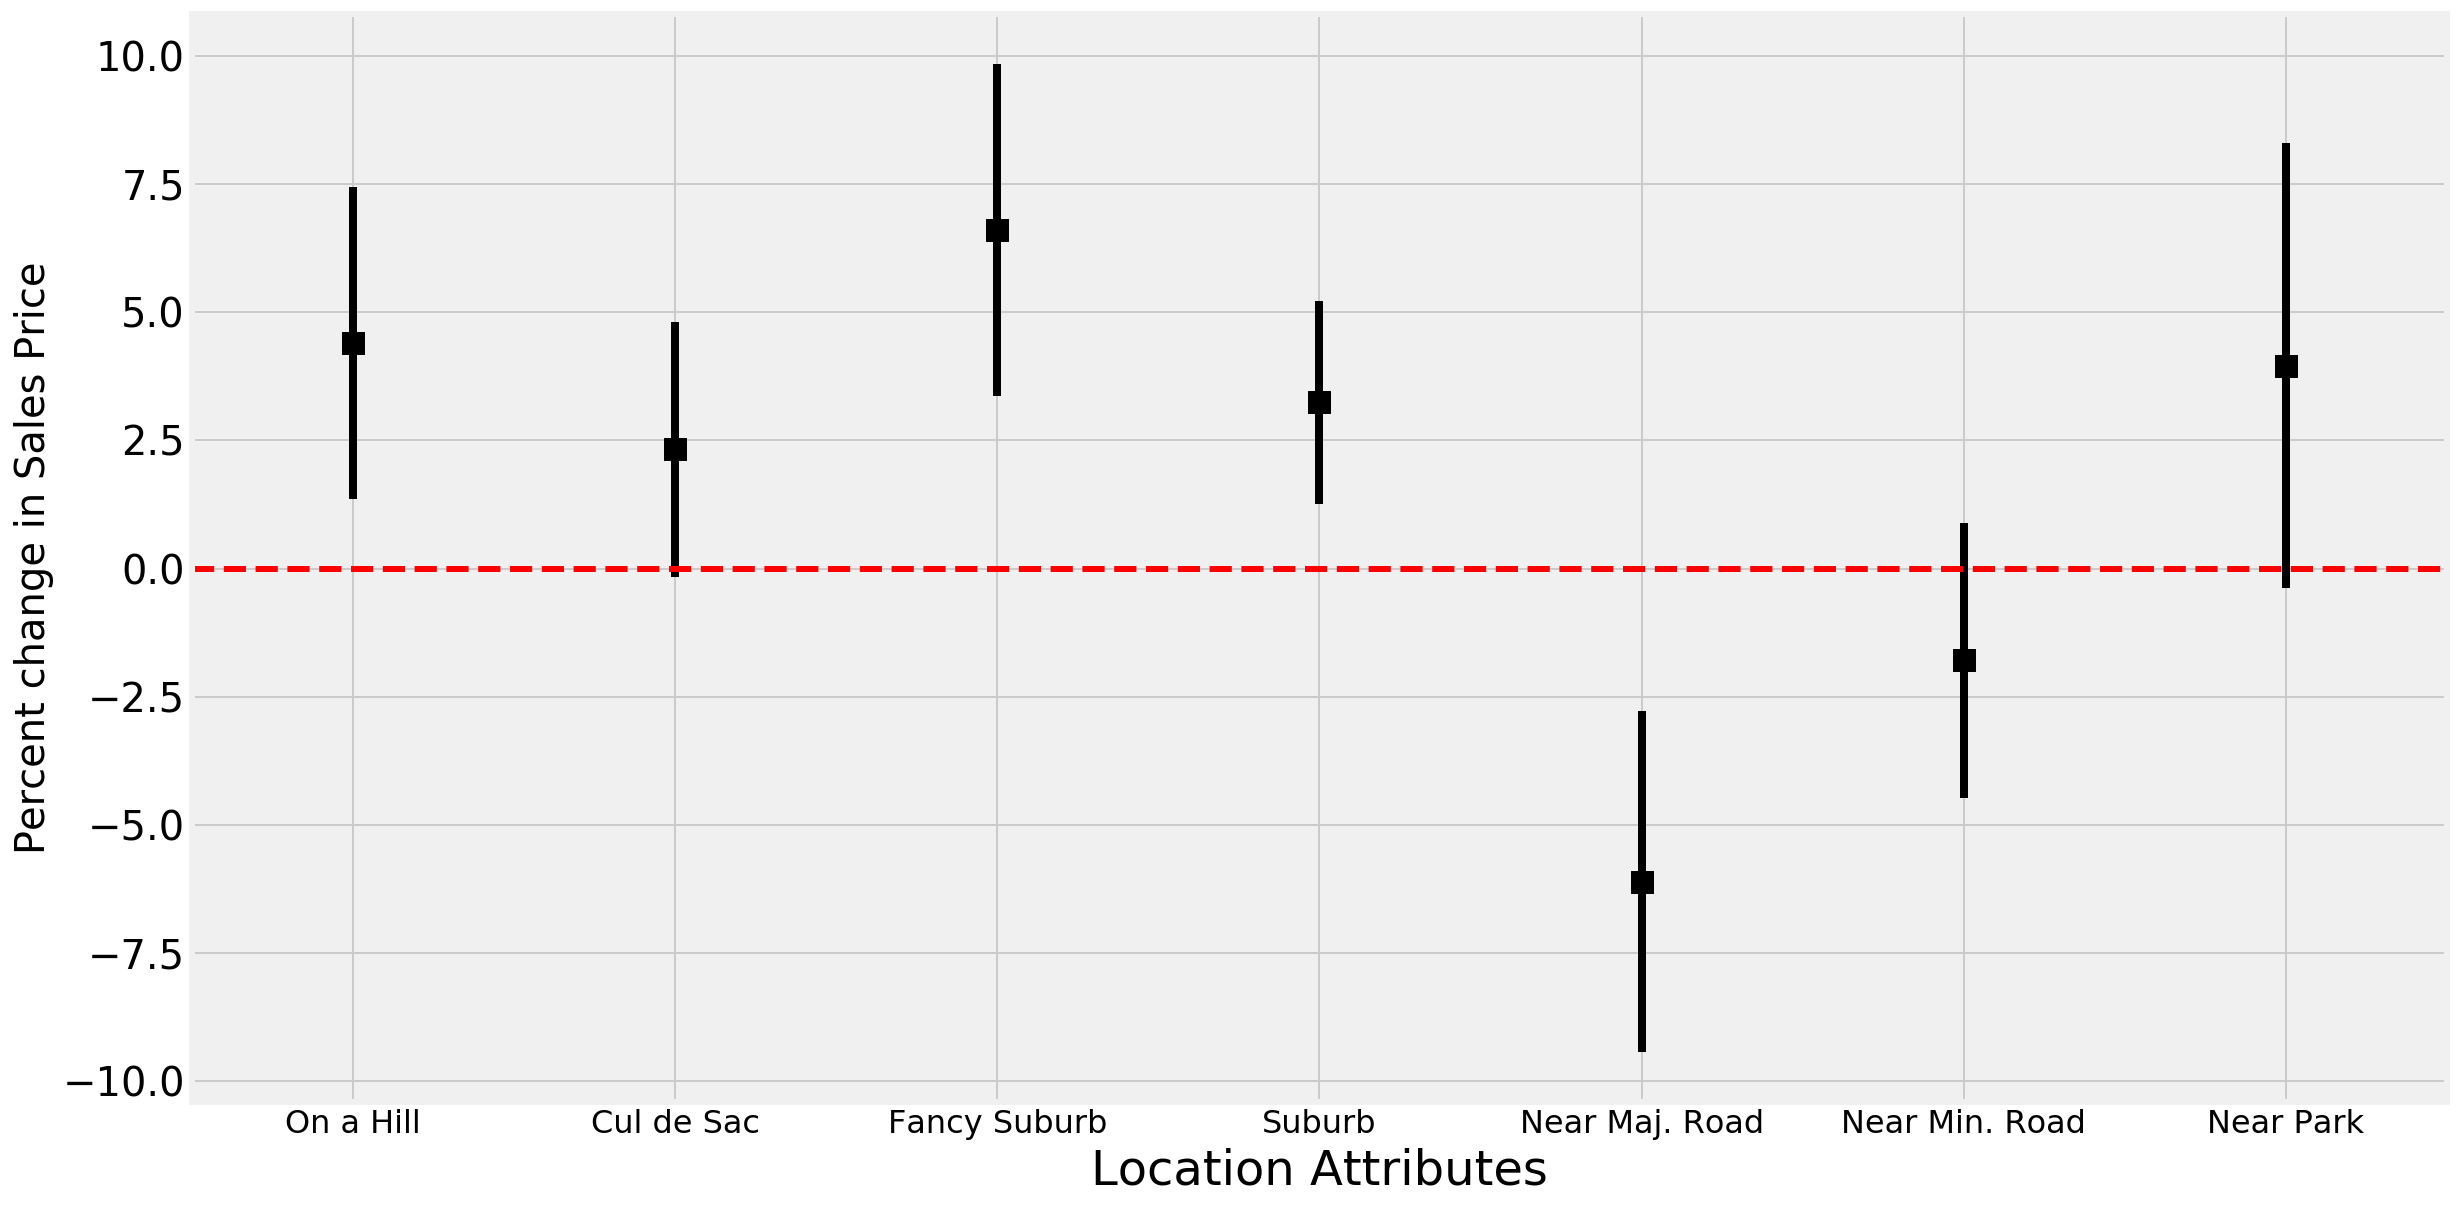

In [23]:
# Location Attributes
coef_df = all_coef_df[12:19].copy()
coef_df['coef']=coef_df['coef']*100 # rescale to percents
coef_df['err']=coef_df['err']*100
ylabel='Percent change in Sales Price'
xlabel='Location Attributes'
varname =['On a Hill', 'Cul de Sac', 'Fancy Suburb','Suburb','Near Maj. Road','Near Min. Road','Near Park']
plot_coefs(coef_df,ylabel,xlabel,varname)
plt.savefig('location.png')

C:\Users\pauls\Anaconda3\envs\dsi\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\pauls\Anaconda3\envs\dsi\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


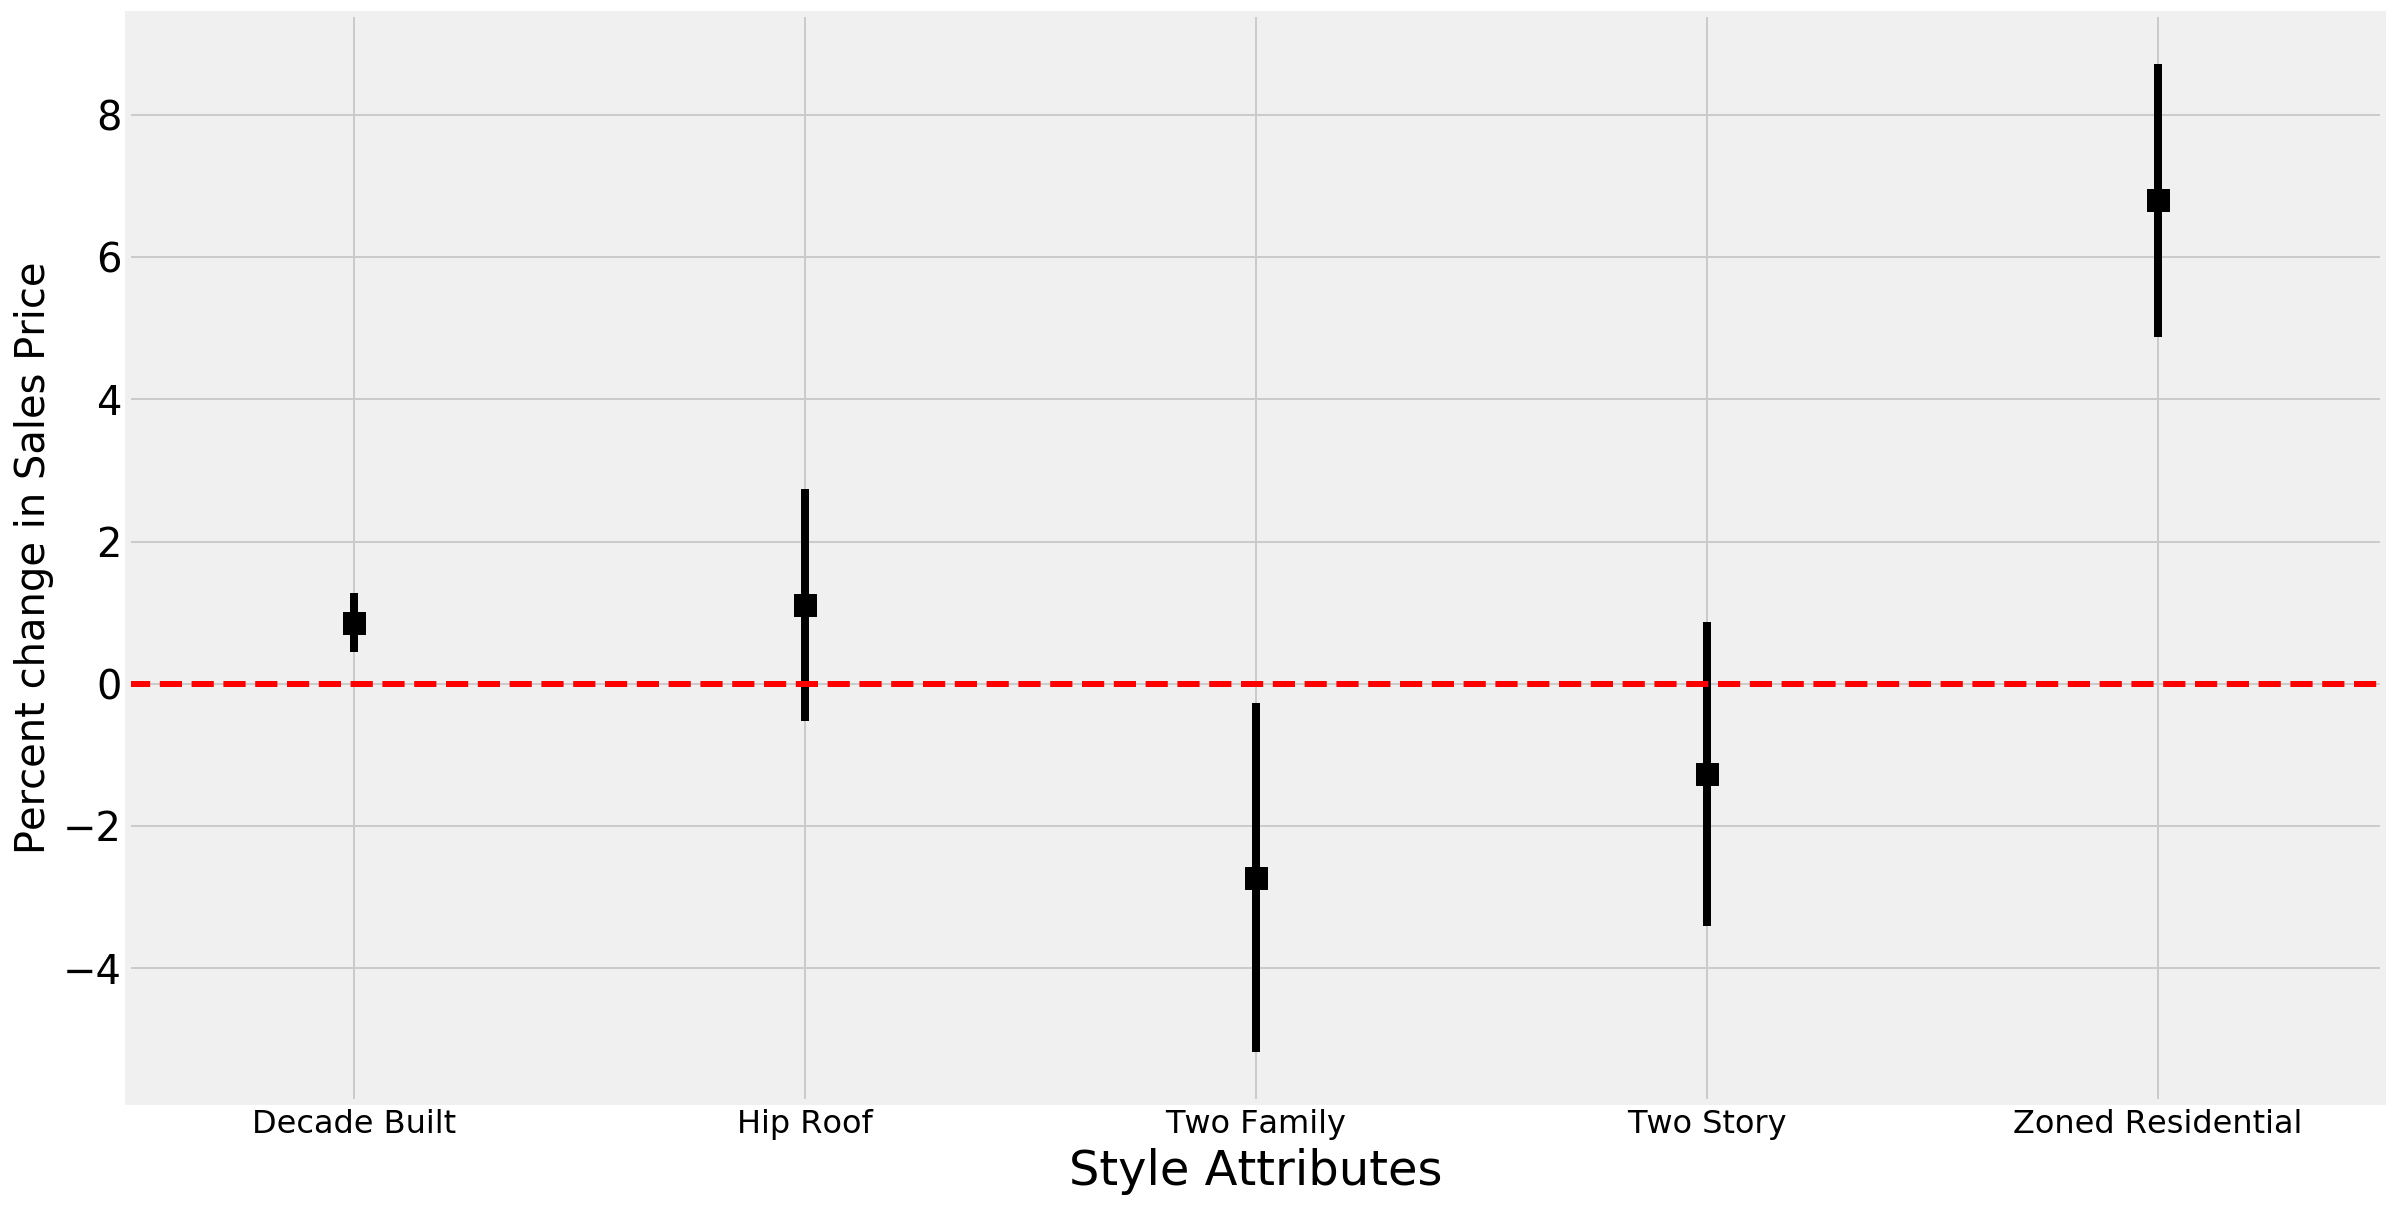

In [24]:
# Housing Style
coef_df = all_coef_df[19:24].copy()
coef_df['coef']=coef_df['coef']*100 # rescale to percents
coef_df['err']=coef_df['err']*100
mask = (coef_df['varname']=='Year Built')
coef_df['coef'][mask]=coef_df['coef']*10 # rescale Year Built to decades
coef_df['err'][mask]=coef_df['err']*10
varname =['Decade Built', 'Hip Roof', 'Two Family','Two Story','Zoned Residential']
ylabel='Percent change in Sales Price'
xlabel='Style Attributes'
plot_coefs(coef_df,ylabel,xlabel,varname)
plt.savefig('style.png')

In [25]:
list(all_coef_df[24:30]['varname'])

['ac', 'Fireplaces', 'breakers', 'unf_garage', 'num_cars', 'paved_driveway']

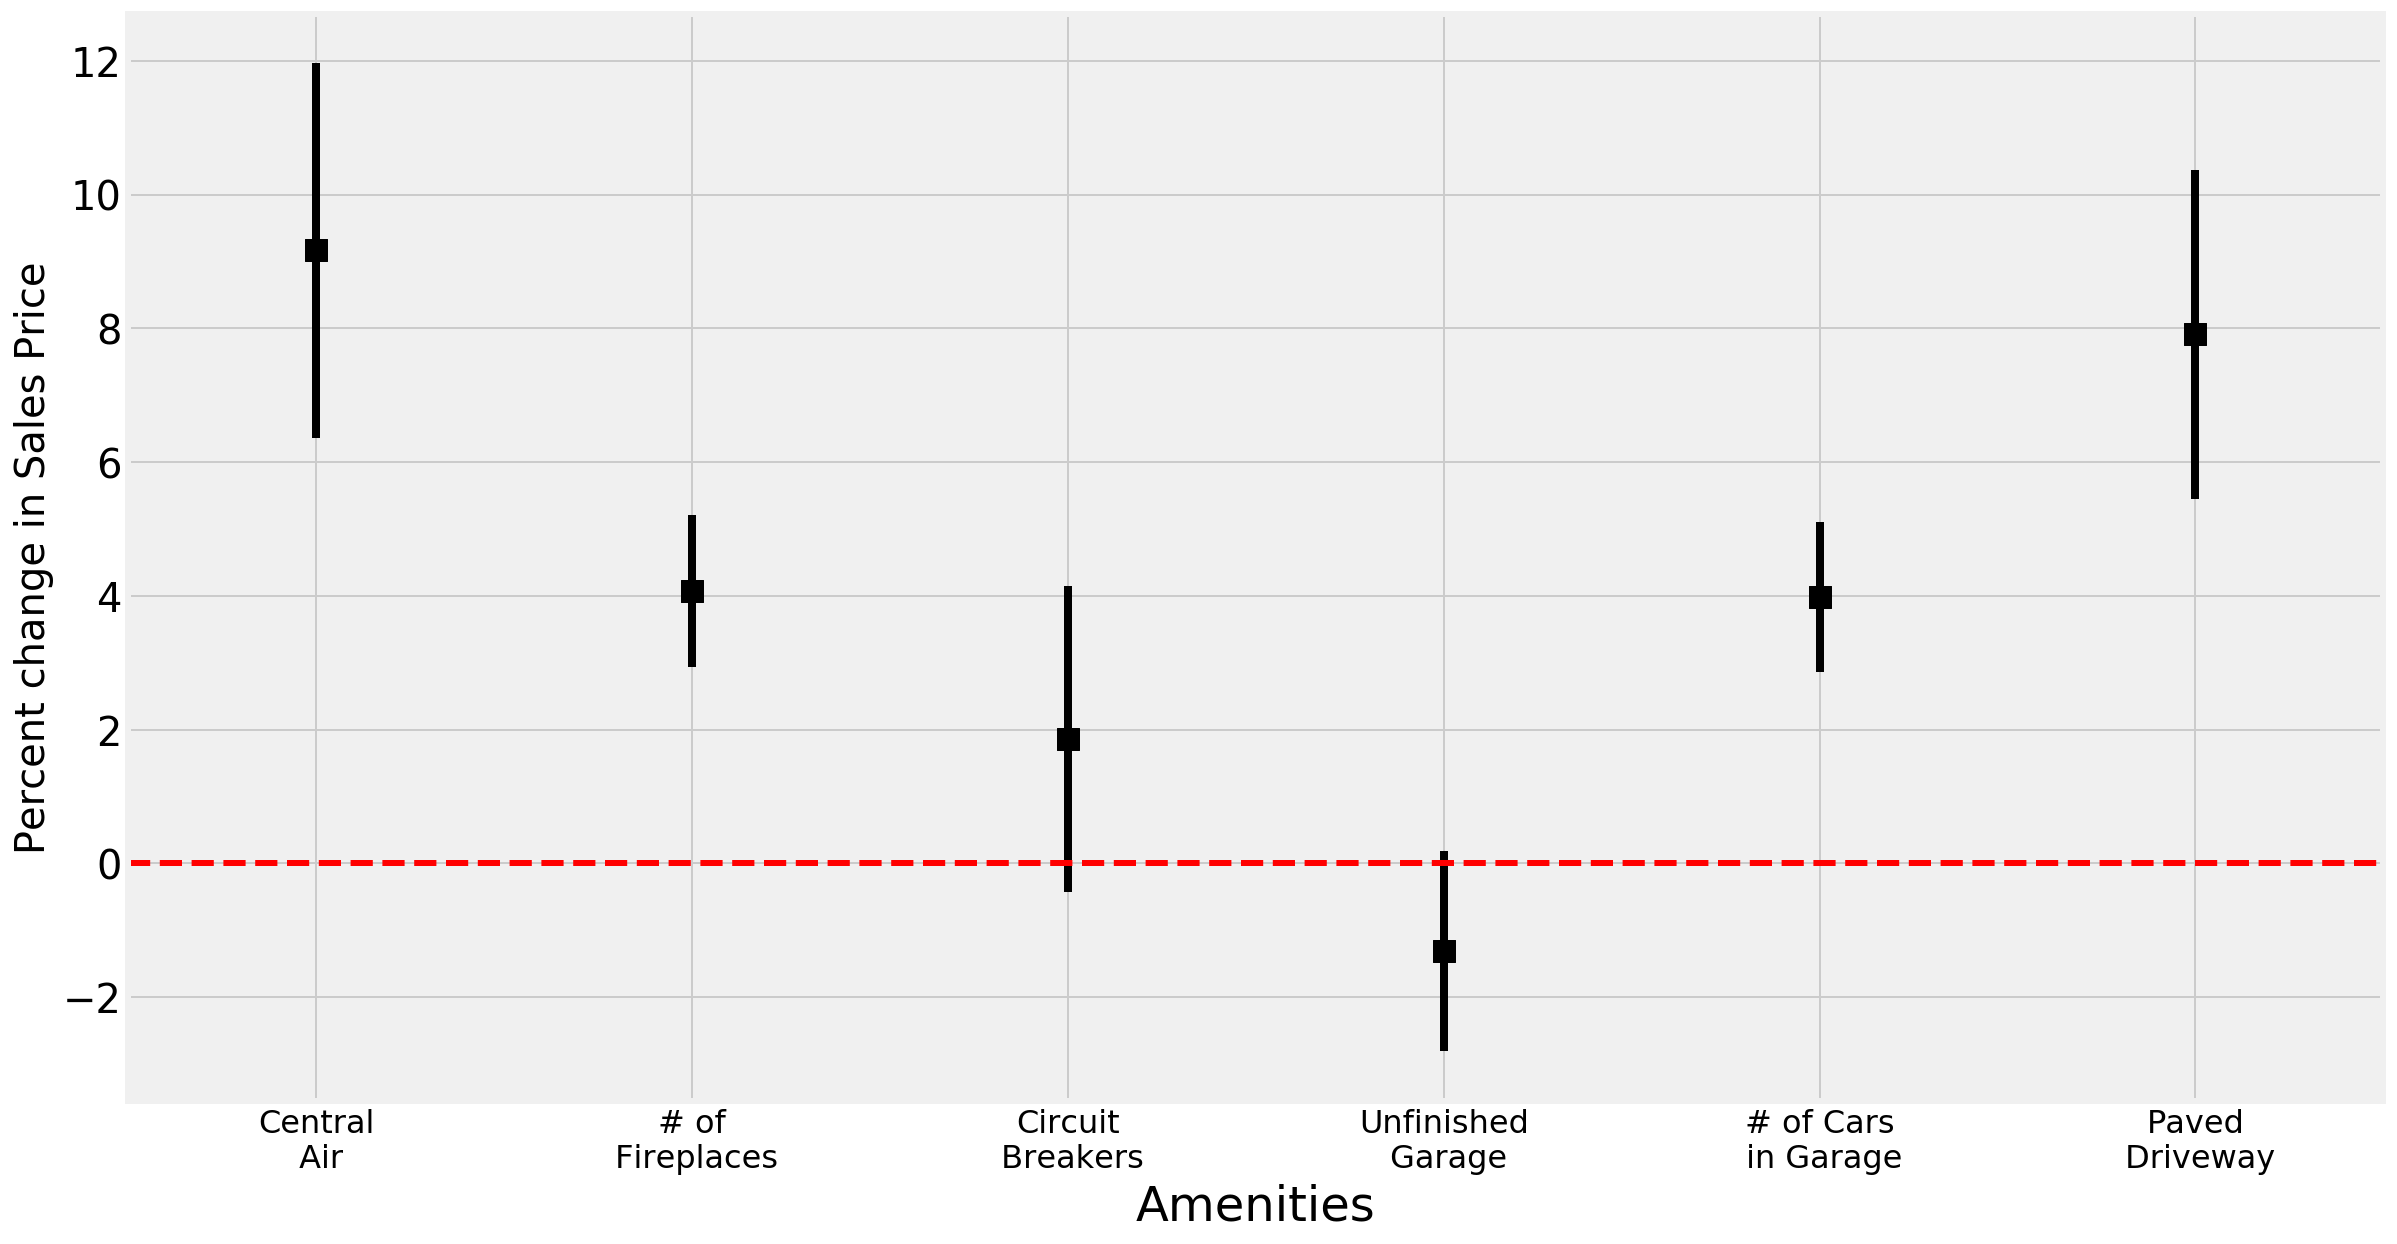

In [26]:
# Amenities
coef_df = all_coef_df[24:30].copy()
coef_df['coef']=coef_df['coef']*100 # rescale to percents
coef_df['err']=coef_df['err']*100
ylabel='Percent change in Sales Price'
xlabel='Amenities'
varname =['Central\n Air','# of\n Fireplaces', 'Circuit\n Breakers', 'Unfinished\n Garage', '# of Cars\n in Garage',
          'Paved\n Driveway' ]
plot_coefs(coef_df,ylabel,xlabel,varname)
plt.savefig('amenities.png')

In [32]:
list(all_coef_df[31:37]['varname'])

['exc_qual',
 'very_good_qual',
 'good_qual',
 'above_avg_qual',
 'below_avg_qual',
 'bad_qual']

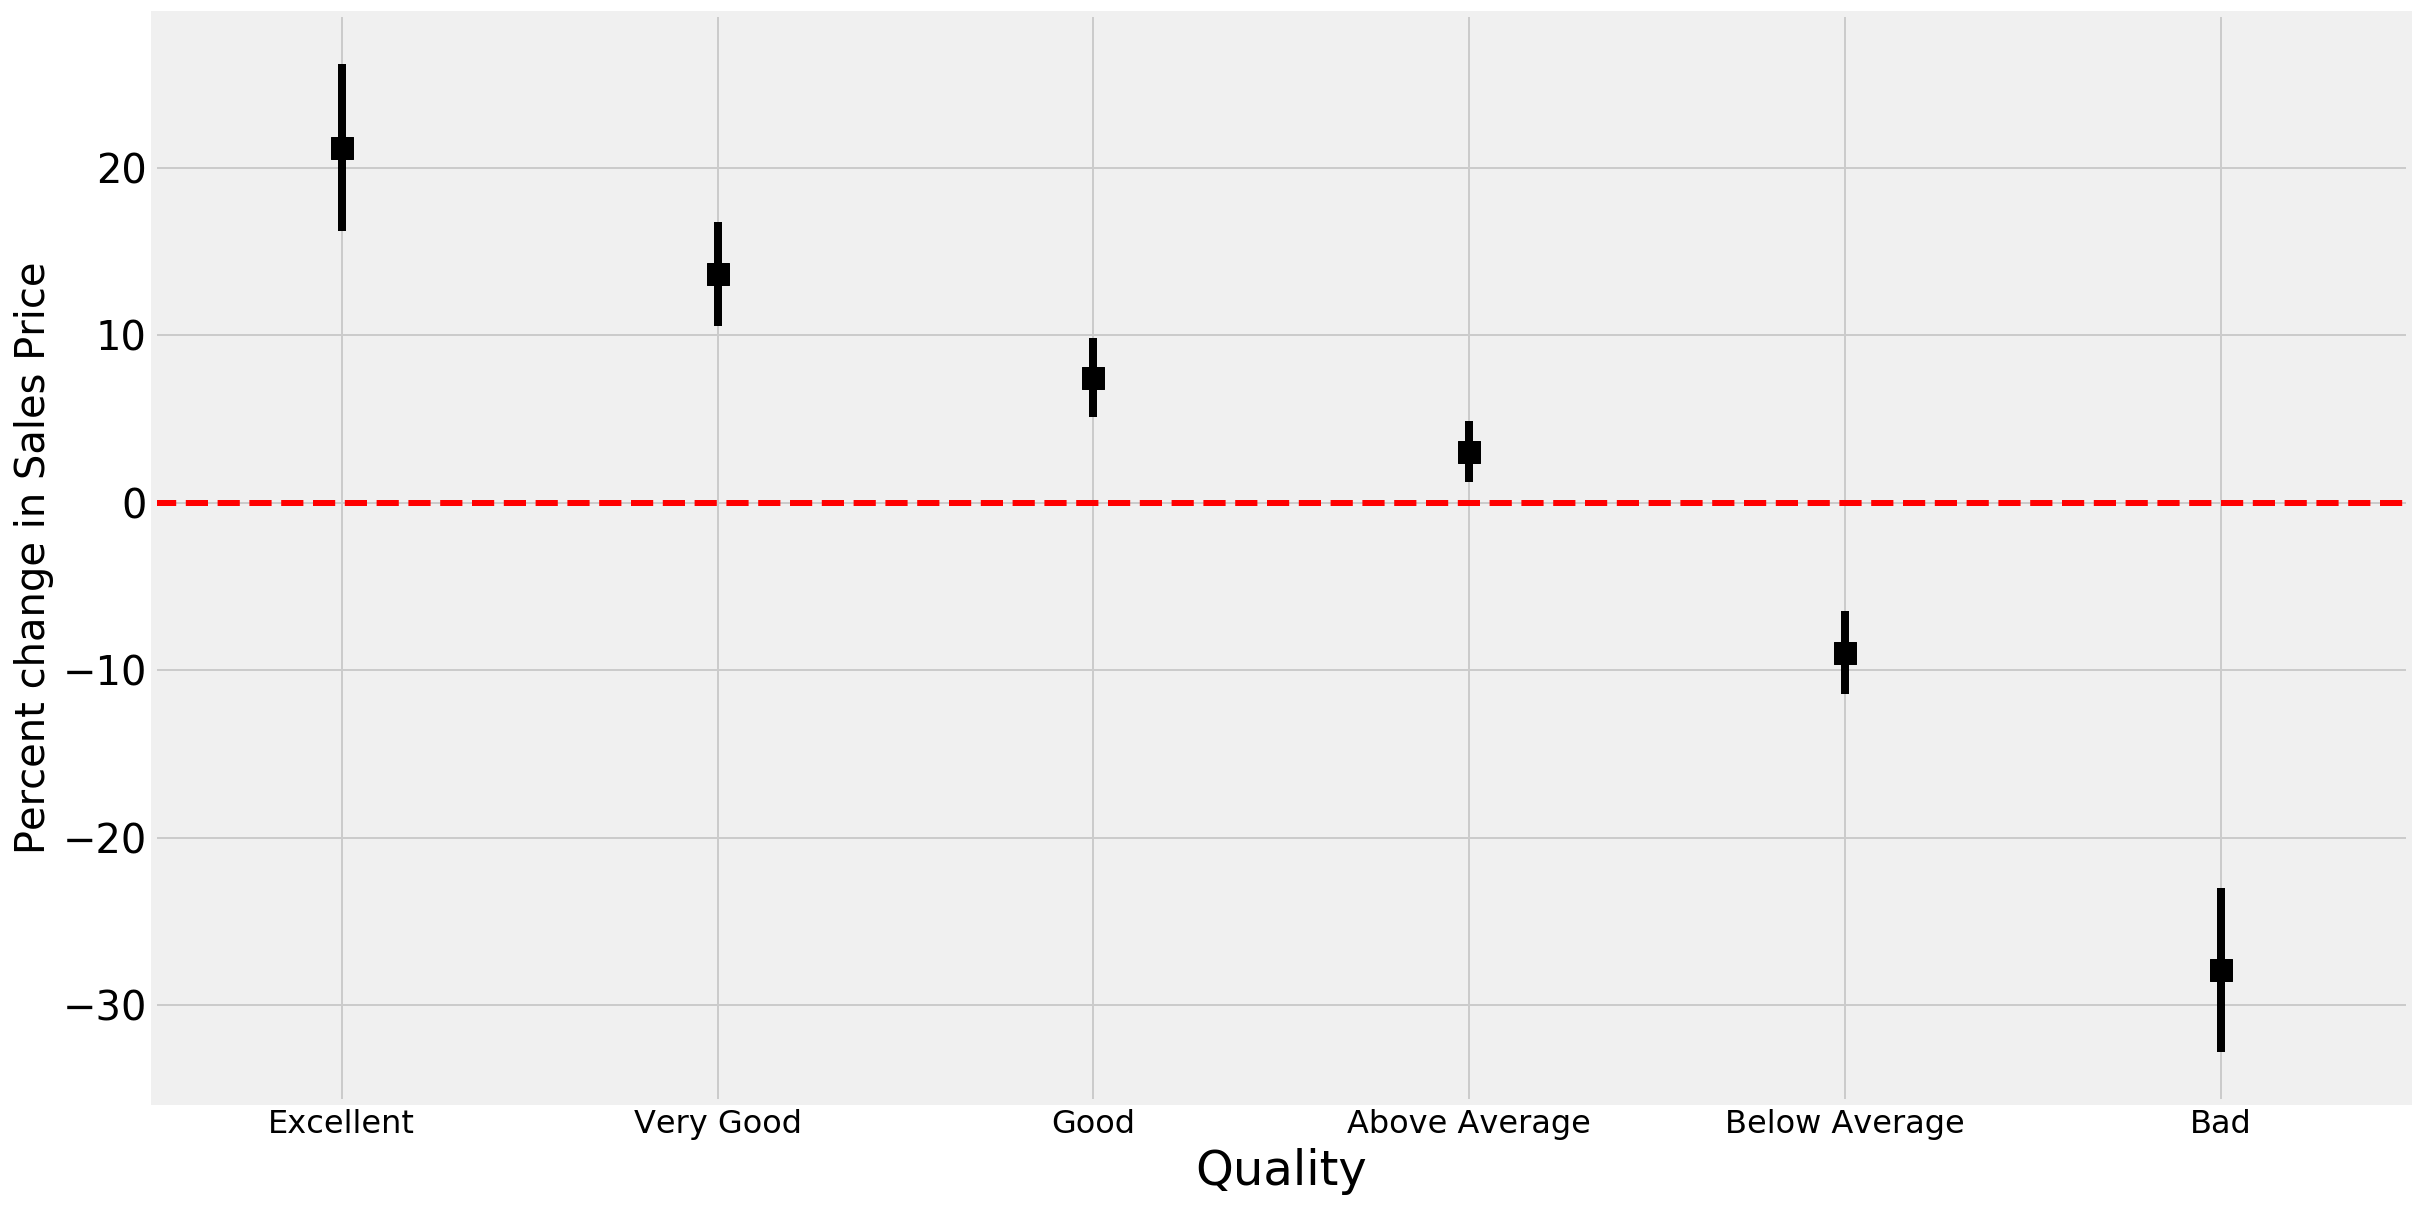

In [33]:
# Quality
coef_df = all_coef_df[31:37].copy()
coef_df['coef']=coef_df['coef']*100 # rescale to percents
coef_df['err']=coef_df['err']*100
ylabel='Percent change in Sales Price'
xlabel='Quality'
varname =['Excellent',
 'Very Good',
 'Good',
 'Above Average',
 'Below Average',
 'Bad']
plot_coefs(coef_df,ylabel,xlabel,varname)
plt.savefig('quality.png')

In [35]:
list(all_coef_df[37:45]['varname'])

['exc_basement',
 'remodel',
 'exc_kitchen',
 'good_kitchen',
 'damage',
 'bad_condition',
 '2009',
 '2010']

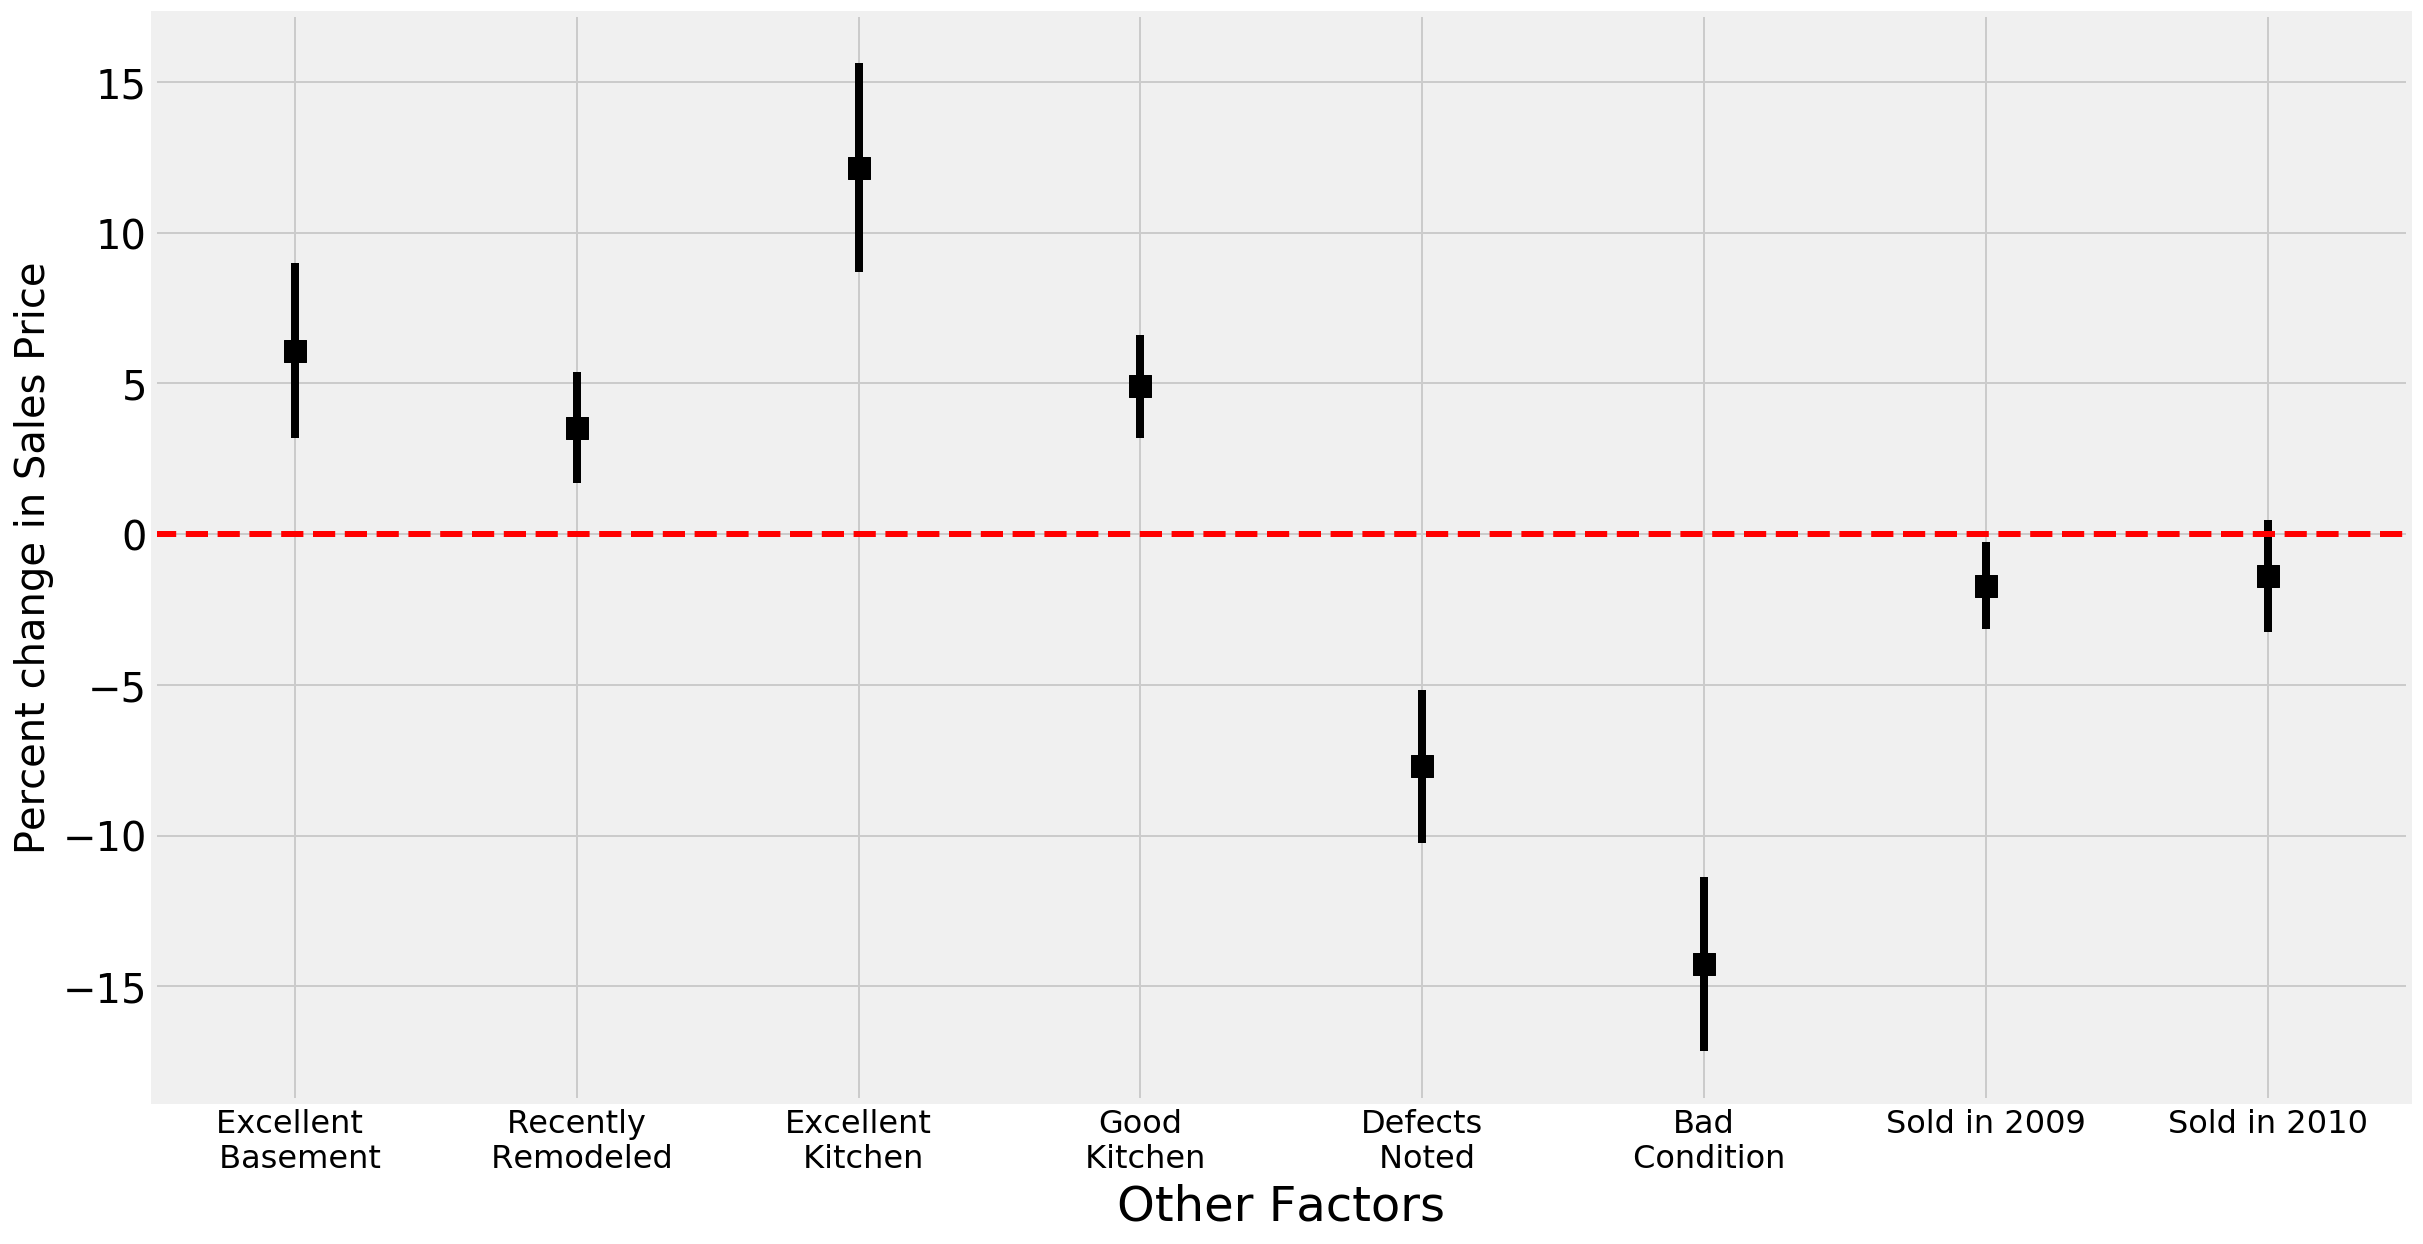

In [36]:
# Other Factors
coef_df = all_coef_df[37:45].copy()
coef_df['coef']=coef_df['coef']*100 # rescale to percents
coef_df['err']=coef_df['err']*100
ylabel='Percent change in Sales Price'
xlabel='Other Factors'
varname =['Excellent \n Basement',
 'Recently\n Remodeled',
 'Excellent\n Kitchen',
 'Good\n Kitchen',
 'Defects\n Noted',
 'Bad\n Condition',
 'Sold in 2009',
 'Sold in 2010']
plot_coefs(coef_df,ylabel,xlabel,varname)
plt.savefig('other.png')